In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import time

In [205]:
start_time = time.time()

In [208]:
df = pd.read_csv('./water_usage.csv')
df.drop(['unit'], axis=1, inplace=True)
df.head()
A = np.sum(df['Total'])/1e3
lamb = 0.1

df_elec = pd.read_csv('./elec_usage.csv')
B = np.sum(df_elec['Elec Consumption(in billion kwh)'])
print(B)### calculate the average daily electricity consumption


1.838398691


In [187]:
elec = eval("""[3933.683204
3577.119783
3566.349395
3335.213361
3299.099057
3468.3302
3401.3622
3840.8015
3614.9732
3581.9664
3591.23499
3481.2981
3179.3055
3180.7328
3577.755
3707.779
3638.8383
3603.821
3466.0974
3155.0505
2729.5634]""".replace('\n', ', '))

waterG = eval("""[19205972
15789278
12528080
9947324
10551848
11843066
11984066
13053619
14510100
14713748
15623871
14747787
11365805
11211927
11907776
12231654
13506530
12181562
11563633
11774078
8173542]""".replace('\n', ', '))

levelG = eval("""[3665.32
3637.85
3607.89
3579.88
3585.86
3600.83
3602.38
3612.42
3626.56
3628.63
3635.90 
3628.87
3595.83
3593.79
3610.47
3604.74
3616.94
3604.11
3596.95
3600.11
3557.57]""".replace('\n', ', '))

waterH = eval("""[20935774
18037362
16037336
14541211
15381733
14530987
13137092
12464762
11489247
10759249
12077029
13798396
12705639
10940605
10071257
9784790
10267537
10144058
10469995
10758113
9532500]""".replace('\n', ', '))

levelH = eval("""[1185.78
1163.17
1145.93
1131.76
1139.87
1131.66
1118
1109.64
1099.72
1091.56
1106.12
1121.91
1110.9
1090.76
1080.68
1077.22
1083.06
1081.57
1085.46
1088.78
1074.01]""".replace('\n', ', '))

elec = np.array(elec)
elec = elec / 1e2

def water_convert(water):
    water = np.array(water)
    water = water * 325846.885 / 1e9
    return water

waterG = water_convert(waterG)
print(waterG)

waterH = water_convert(waterH)
print(waterH)

[6258.2061496  5144.8870527  4082.23584303 3241.30453949 3438.28680179
 3859.02616495 3904.97057573 4253.48108913 4728.07088604 4794.42895247
 5090.98969699 4805.52045459 3703.51215477 3653.3714878  3880.11171688
 3985.6463543  4401.06072766 3969.32403213 3767.97379233 3836.54664005
 2663.32320012]
[6821.85674296 5877.41822132 5225.7159793  4738.20830848 5012.08978395
 4734.87684993 4280.68050616 4061.60386997 3743.73534595 3505.86777159
 3935.2622797  4496.1643546  4140.09289008 3564.96205927 3281.68772148
 3188.34334188 3345.64494807 3305.40970056 3411.61525672 3505.49760953
 3106.13543126]


In [188]:
from sympy import *
def ln_fitting(X, Y): ### Y = a * ln X + b
    ### the type of X and Y should be np.array
    a = Symbol('a')
    b = Symbol('b')
    poly1 = a * np.sum(np.square(np.log(X))) + b * np.sum(np.log(X)) - np.sum(np.log(X) * Y) 
    poly2 = a * np.sum(np.log(X)) + b * len(X) - np.sum(Y)
    a, b =  list(solve([poly1, poly2], [a, b]).values())[0], list(solve([poly1, poly2], [a, b]).values())[1]
    return a, b


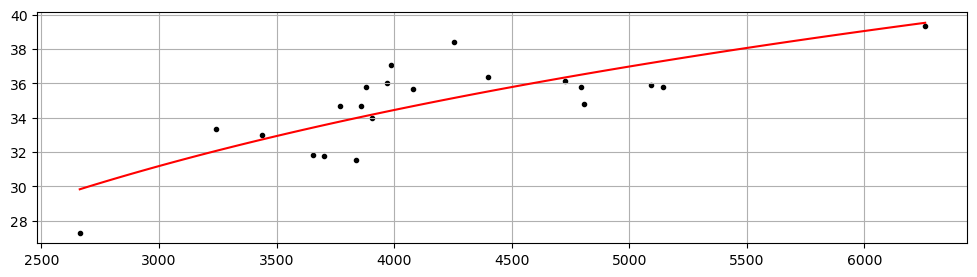

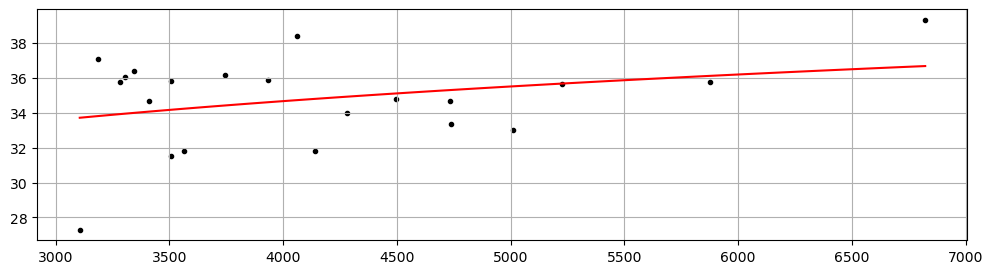

In [189]:
df = pd.DataFrame(elec, columns=['elec'])
df['waterG'] = waterG
df['waterH'] = waterH
fig = plt.figure(figsize =(12,3))
plt.scatter(df['waterG'],df['elec'],marker = '.',color = 'k')
plt.grid(True)
# elec = a * water + b
data_g, data_h, data_elec = df['waterG'].to_numpy(), df['waterH'].to_numpy(), df['elec'].to_numpy()
a_G, b_G = ln_fitting(data_g, data_elec)

### plot the fitting curve
x = np.linspace(min(data_g), max(data_g), 100)
y = a_G * np.log(x) + b_G
plt.plot(x, y, color = 'r')

fig = plt.figure(figsize =(12,3))
plt.scatter(df['waterH'],df['elec'],marker = '.',color = 'k')
plt.grid(True)
a_H, b_H = ln_fitting(data_h, data_elec)

### plot the fitting curve
x = np.linspace(min(data_h), max(data_h), 100)
y = a_H * np.log(x) + b_H
plt.plot(x, y, color = 'r')


In [190]:
print("Fitting for dam G")
print("---------------------")
print('slope: %.4f' % a_G)
print('intercept: %.4f' % b_G)
print('The linear regression function: y = %.4f ln(x) + %.4f' %
      (a_G, b_G))

print("Fitting for dam H")
print("---------------------")
print('slope: %.4f' % a_H)
print('intercept: %.4f' % b_H)
print('The linear regression function: y = %.4f ln(x) + %.4f' %
      (a_H, b_H))


Fitting for dam G
---------------------
slope: 11.3621
intercept: -59.7852
The linear regression function: y = 11.3621 ln(x) + -59.7852
Fitting for dam H
---------------------
slope: 3.7674
intercept: 3.4251
The linear regression function: y = 3.7674 ln(x) + 3.4251


In [191]:
### here mu is the slope
mu_G = a_G
phi_G = b_G
### here mu is the slope
mu_H = a_H
phi_H = b_H

/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_80520/2274953697.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  levelG2waterG.fit(df2['levelG'][:,np.newaxis], df2['waterG'][:,np.newaxis])


LinearRegression()

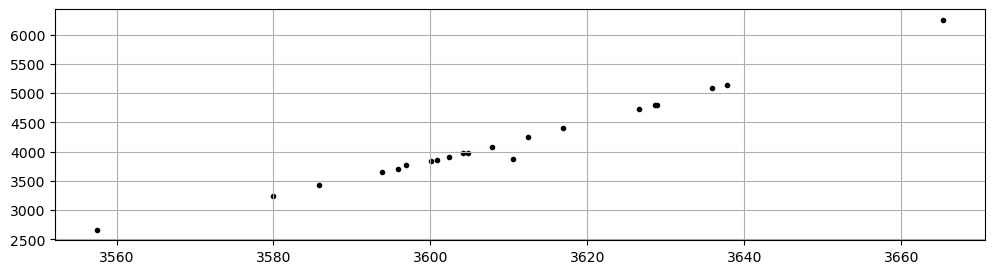

In [192]:
# water = a * level + b
df2 = pd.DataFrame(levelG, columns=['levelG'])
df2['waterG'] = waterG
fig = plt.figure(figsize =(12,3))
plt.scatter(df2['levelG'],df2['waterG'],marker = '.',color = 'k')
plt.grid(True)

levelG2waterG = linear_model.LinearRegression()
levelG2waterG.fit(df2['levelG'][:,np.newaxis], df2['waterG'][:,np.newaxis])

In [193]:
print('slope: %.4f' % levelG2waterG.coef_[0])
print('intercept: %.4f' % levelG2waterG.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %(levelG2waterG.coef_[0], levelG2waterG.intercept_))

slope: 33.2906
intercept: -115987.1261
The linear regression function: y = 33.2906x + -115987.1261


In [194]:
print('The transformation from level to water volumn for dam G is: volume = %.4f * level + %.4f' %(levelG2waterG.coef_[0], levelG2waterG.intercept_))

The transformation from level to water volumn for dam G is: volume = 33.2906 * level + -115987.1261


/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_80520/3986053116.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  levelH2waterH.fit(df2['levelH'][:,np.newaxis], df2['waterH'][:,np.newaxis])


LinearRegression()

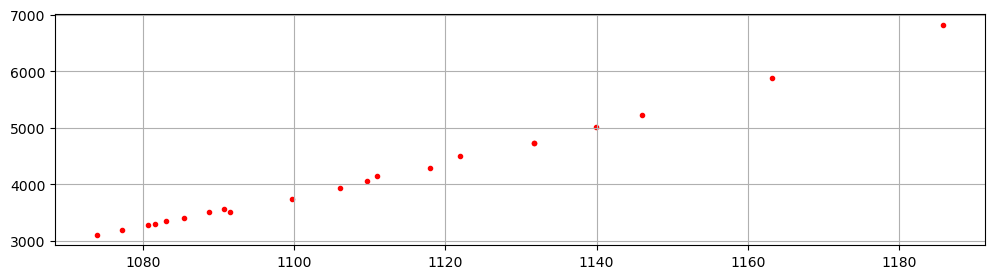

In [195]:
# water = a * level + b
df2 = pd.DataFrame(levelH, columns=['levelH'])
df2['waterH'] = waterH
fig = plt.figure(figsize =(12,3))
plt.scatter(df2['levelH'],df2['waterH'],marker = '.',color = 'r')
plt.grid(True)

levelH2waterH = linear_model.LinearRegression()
levelH2waterH.fit(df2['levelH'][:,np.newaxis], df2['waterH'][:,np.newaxis])

In [196]:
print('slope: %.4f' % levelH2waterH.coef_[0])
print('intercept: %.4f' % levelH2waterH.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %(levelH2waterH.coef_[0], levelH2waterH.intercept_))

slope: 31.7852
intercept: -31136.6688
The linear regression function: y = 31.7852x + -31136.6688


In [197]:
print('The transformation from level to water volumn for dam H is: volume = %.4f * level + %.4f' %(levelH2waterH.coef_[0], levelH2waterH.intercept_))

The transformation from level to water volumn for dam H is: volume = 31.7852 * level + -31136.6688


$\mathrm{H}$ 坝水位为 $\mathrm{M}, \mathrm{G}$ 坝水位是 $\mathrm{P}$，对应的水量分别为 $\mathrm{M}_v, \mathrm{P}_v$ 。假设 $\mathrm{H}$ 坝中的 $\lambda$ 比例出水会进入 $\mathrm{G}$ 坝, $\mathrm{H}$ 坝出水速率为 $x$ ， $\mathrm{G}$ 坝出水速率为 $y$. 所有单位时间水需求量是 $A=a_1+a_2+a_3+a_4+a_5$, 单位时间电需求量是 $B=b_1+b_2+b_3+b_4+b_5$, 两个大坝的最低水量之和为 $K$, 分别为 $M_{\min v}, P_{\min v}$ ，提供电力和水量关系系数分别是 $\mu_1, \mu_2$. 两个大坝的最长持续时间是 $T$ 那么满足以下公式:
已知数据: $M, P, A, B, \mu_1, \mu_2, \lambda$ 要求: $x, y, T, M_{\min v}, P_{\min v}$
- $M_v - x * T=M_{\min v} * T$
- $P_v + \lambda * x * T-y * T=P_{\min v} * T$
- $A=y+(1-\lambda) * x$
- $B=\mu_1 * ln(M_{\min v}) + \mu_2 * ln(P_{\min v})$
- $ \frac{M_v}{P_v} = \frac{M_{\min v}}{P_{\min v}} $

解为:

$$
\begin{aligned}
& r = \frac{M_v}{P_v} \\
& P_{\min v} = \mathrm e ^ {\frac{B - \mu_1 * ln(r)}{\mu_1 + \mu_2}} \\
& M_{\min v} = r * P_{\min v} \\
& T=\frac{(r+1) * P_v}{A + (r+1) * P_{\min v}}\\
& x=\frac{M_v}{T} - M_{\min v} \\
& y=A + (\lambda - 1) * x \\
\end{aligned}
$$

In [198]:
M, P = 3610.47, 1080.68
loss_H = exp(-phi_H / mu_H)
loss_G = exp(-phi_G / mu_G)
M_v = levelG2waterG.coef_[0]*M + levelG2waterG.intercept_ - loss_H
P_v = levelH2waterH.coef_[0]*P + levelH2waterH.intercept_ - loss_G
ratio = (M_v ).squeeze()/(P_v ).squeeze()
P_min = exp((B - mu_H * ln(ratio))/(mu_G + mu_H))
M_min = ratio * P_min
T = (ratio+1) * P_v / (A + (ratio + 1) * P_min)
x = M_v / T - ratio * B / (mu_H * ratio + mu_G)
y = A + (lamb - 1) * x
print(loss_H, loss_G)
print("Assume M and P is 3610.47 and 1080.68, respectively (2021 data)")
print("All the pre-known parameters known from data are:")
print("------------------------------------------------")
print("A = ", A, "with the unit of billion gallons per day")
print("B = ", B, "with the unit of billion kwh per day")
print("lambda = ", lamb)
print("mu_1 = ", mu_H)
print("phi_1 = ", phi_H)
print("mu_2 = ", mu_G)
print("phi_2 = ", phi_G)
print("\n")
print("The further calculated parameters are:")
print("------------------------------------------------")
print('M_v is : {}'.format(M_v + loss_H))
print('P_v is : {}'.format(P_v + loss_G))
print("Assume the ratio is M_v / P_v = M_min v / P_min v = {}".format(ratio))
print("M_min v is : {}".format(M_min + loss_H))
print("P_min v is : {}".format(P_min + loss_G))
print()
print("The final result is:")
print("------------------------------------------------")
print("x = {}".format(x))
print("y = {}".format(y))
print("T = {}".format(T))


0.402866840525917 192.830940038404
Assume M and P is 3610.47 and 1080.68, respectively (2021 data)
All the pre-known parameters known from data are:
------------------------------------------------
A =  44.26947 with the unit of billion gallons per day
B =  3.26302012230137 with the unit of billion kwh per day
lambda =  0.1
mu_1 =  3.76738460077597
phi_1 =  3.42511466638001
mu_2 =  11.3620845053255
phi_2 =  -59.7851735772582


The further calculated parameters are:
------------------------------------------------
M_v is : [4207.62505154297]
P_v is : [3212.94285879153]
Assume the ratio is M_v / P_v = M_min v / P_min v = 1.39306830272682
M_min v is : 1.99429683237675
P_min v is : 193.973331971905

The final result is:
------------------------------------------------
x = [27.0881964486692]
y = [19.8900931961977]
T = [153.762296371362]


In [199]:
end_time = time.time()
print("The total time is: %.4f seconds" %(end_time - start_time))

The total time is: 1.4487 seconds


[[13080.06289256 11022.30527402  9307.95182233  7979.51284796
   8450.37658575  8593.90301487  8185.65108189  8315.08495909
   8471.80623198  8300.29672406  9026.2519767   9301.68480919
   7843.60504485  7218.33354706  7161.79943836  7173.98969618
   7746.70567573  7274.73373269  7179.58904905  7342.04424958
   5769.45863138]
 [   39.33683204    35.77119783    35.66349395    33.35213361
     32.99099057    34.683302      34.013622      38.408015
     36.149732      35.819664      35.9123499     34.812981
     31.793055      31.807328      35.77755       37.07779
     36.388383      36.03821       34.660974      31.550505
     27.295634  ]]
slope: 9.6416
intercept: -52.1632
The linear regression function: y = 9.6416 lnx + -52.1632


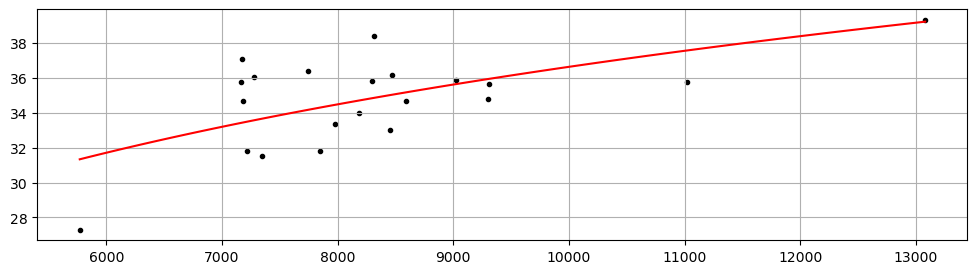

In [200]:
### add on Jan 12
fig = plt.figure(figsize =(12,3))
plt.scatter(df['waterG']+df['waterH'],df['elec'],marker = '.',color = 'k')
plt.grid(True)
# elec = a * water + b
data = np.array([df['waterG']+df['waterH'],df['elec']])
print(data)
a, b = ln_fitting(data[0], data[1])
### plot the fitting line
x = np.linspace(min(data[0]), max(data[0]), 100)
y = a * np.log(x) + b
plt.plot(x, y, 'r')

print('slope: %.4f' % a)
print('intercept: %.4f' % b)
print('The linear regression function: y = %.4f lnx + %.4f' %(a, b))
### 


In [202]:
print(exp(-b/a))
print(- a * np.log(193))

223.677221734676
-50.7409440374670
